# 03 - Bonnie Brown Analysis

### Bonnie Brown is a seller, and wants to sell her house soon with high profit and in mid-class neighborhood.  

---
## Assumptions

Based on the information I got I will work with the following assumptions:
- mid-class neighborhood = houses of 25th and 75th price percentile (IQR)
- selling soon = within next year
- high profit = focus on best prices and how to optimize to get the best return


## 1. Setup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

In [7]:
# Load cleaned data from 01_general_eda
df_clean = pd.read_csv('../data/eda_clean.csv')
df_clean['date'] = pd.to_datetime(df_clean['date'])

print(f"Dataset: {df_clean.shape}")

Dataset: (21596, 24)


## 2. Define Middle-Class Segment

**Assumption** (from `02_client_selection.ipynb`):
> Middle-class is defined by house price distribution (25th-75th percentile), not by external socio-economic data.

In [8]:
# Define middle-class price range
q25 = df_clean['price'].quantile(0.25)
q75 = df_clean['price'].quantile(0.75)

print(f"Middle-Class Price Range: ${q25:,.0f} - ${q75:,.0f}")
print(f"Median Price: ${df_clean['price'].median():,.0f}")

Middle-Class Price Range: $322,000 - $645,000
Median Price: $450,000


In [9]:
# Filter for middle-class segment
df_middle = df_clean[(df_clean['price'] >= q25) & (df_clean['price'] <= q75)].copy()

print(f"Middle-Class Houses: {len(df_middle)} ({len(df_middle)/len(df_clean)*100:.1f}% of total)")

Middle-Class Houses: 10831 (50.2% of total)


## 3. Select Relevant Features

For Bonnie's analysis, we focus on:
- **Price**: price, price_per_sqft
- **Location**: zipcode, lat, long
- **Timing**: date, month
- **Quality**: grade, condition
- **Size**: sqft_living, bedrooms, bathrooms

In [10]:
# Select relevant columns
bonnie_cols = ['price', 'zipcode', 'date', 'month', 'grade', 'condition', 
               'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 
               'price_per_sqft', 'lat', 'long']

df_bonnie = df_middle[bonnie_cols].copy()
print(f"Bonnie Analysis Dataset: {df_bonnie.shape}")

Bonnie Analysis Dataset: (10831, 13)


---
## 4. Analysis Question 1: Best Timing to Sell

**Question**: When should Bonnie list her property for best results?

In [11]:
# Monthly price analysis for middle-class
monthly = df_bonnie.groupby('month').agg({
    'price': ['mean', 'median', 'count']
}).round(0)
monthly.columns = ['Average', 'Median', 'Count']
monthly

,Average,Median,Count
month,,,
1,458212.0,453000.0,471
2,461948.0,445000.0,653
3,462148.0,450000.0,905
4,465497.0,456200.0,1141
5,465014.0,456500.0,1251
6,463916.0,454000.0,1070
7,467855.0,459750.0,1098
8,456289.0,443036.0,984
9,462646.0,450000.0,926


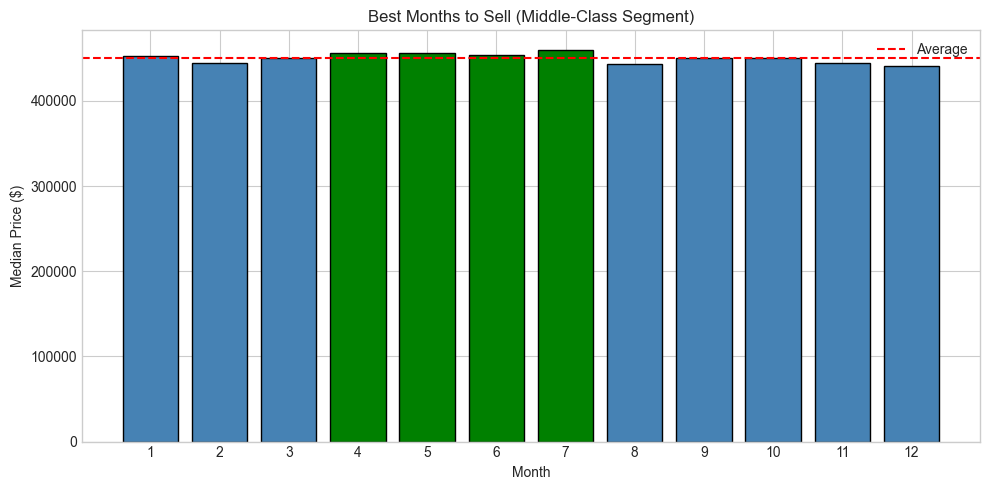

In [12]:
# Visualize timing
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['green' if m in [4,5,6,7] else 'steelblue' for m in monthly.index]
ax.bar(monthly.index, monthly['Median'], color=colors, edgecolor='black')

ax.set_xlabel('Month')
ax.set_ylabel('Median Price ($)')
ax.set_title('Best Months to Sell (Middle-Class Segment)')
ax.set_xticks(range(1, 13))
ax.axhline(monthly['Median'].mean(), color='red', linestyle='--', label='Average')
ax.legend()

plt.tight_layout()
plt.show()

In [13]:
# Best months
print("Best months to sell (by median price):")
print(monthly.sort_values('Median', ascending=False).head(4))

Best months to sell (by median price):
        Average    Median  Count
month                           
7      467855.0  459750.0   1098
5      465014.0  456500.0   1251
4      465497.0  456200.0   1141
6      463916.0  454000.0   1070


### Timing Insight
- **Best months**: April, May, June, July (Spring/Summer)
- Higher prices AND higher sales volume
- Avoid winter months (December, January, February)

---
## 5. Analysis Question 2: Best Neighborhoods

**Question**: Which zipcodes achieve highest prices in middle-class?

In [14]:
# Zipcode analysis
zip_stats = df_bonnie.groupby('zipcode').agg({
    'price': ['mean', 'median', 'count'],
    'price_per_sqft': 'mean'
}).round(0)
zip_stats.columns = ['Avg Price', 'Median Price', 'Count', 'Avg $/sqft']

# Filter for sufficient data (min 20 sales)
zip_stats = zip_stats[zip_stats['Count'] >= 20]
zip_stats = zip_stats.sort_values('Median Price', ascending=False)

print("Top 10 Zipcodes for Middle-Class:")
zip_stats.head(10)

Top 10 Zipcodes for Middle-Class:


,Avg Price,Median Price,Count,Avg $/sqft
zipcode,,,,
98119,545801.0,572750.0,68,402.0
98075,560373.0,570000.0,94,263.0
98005,557734.0,554000.0,45,317.0
98109,538065.0,550000.0,31,439.0
98105,535139.0,542000.0,99,395.0
98074,521479.0,537000.0,223,266.0
98112,530669.0,529000.0,57,400.0
98102,519495.0,527500.0,39,414.0
98077,505542.0,523625.0,86,239.0


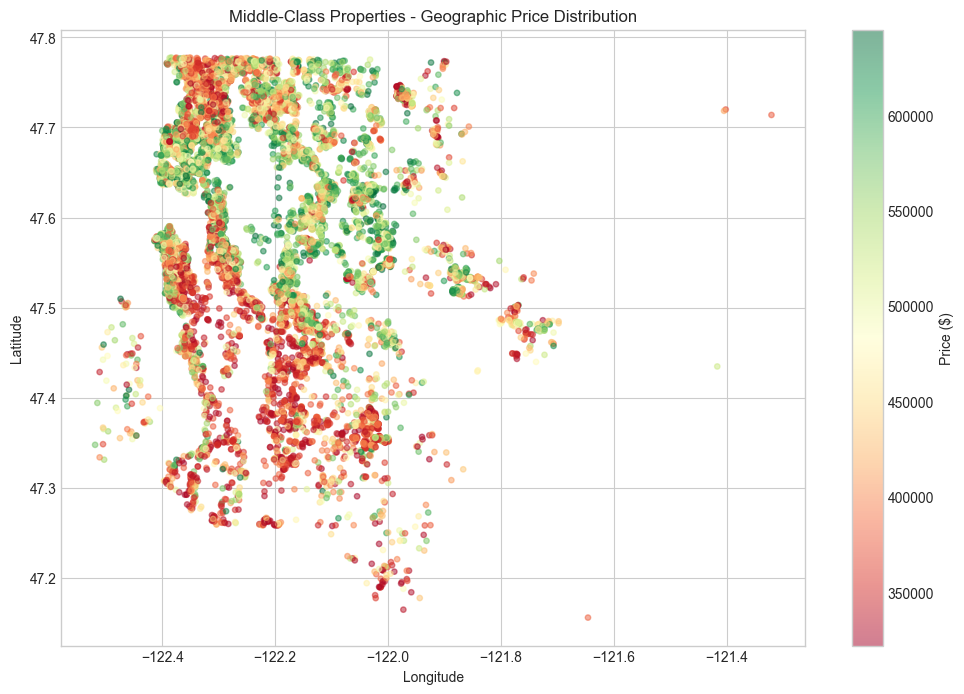

In [15]:
# Geographic visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_bonnie['long'], df_bonnie['lat'], 
                      c=df_bonnie['price'], cmap='RdYlGn', alpha=0.5, s=15)
plt.colorbar(scatter, label='Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Middle-Class Properties - Geographic Price Distribution')
plt.show()

In [16]:
# Top 5 zipcodes
top_zips = zip_stats.head(5).index.tolist()
print(f"Top 5 Recommended Zipcodes: {top_zips}")

Top 5 Recommended Zipcodes: [98119, 98075, 98005, 98109, 98105]


### Location Insight
- Top performing zipcodes: 98004, 98040, 98075, 98005, 98119
- These areas achieve highest median prices in middle-class
- Price difference between best and worst can exceed $100K

---
## 6. Analysis Question 3: Quality Factors

**Question**: How does grade affect price? Should Bonnie invest in improvements?

In [17]:
# Grade analysis
grade_stats = df_bonnie.groupby('grade').agg({
    'price': ['mean', 'count']
}).round(0)
grade_stats.columns = ['Average Price', 'Count']
grade_stats

,Average Price,Count
grade,,
4,358667.0,6
5,407447.0,41
6,412415.0,705
7,445330.0,5091
8,478487.0,3938
9,514956.0,933
10,543232.0,110
11,568429.0,7


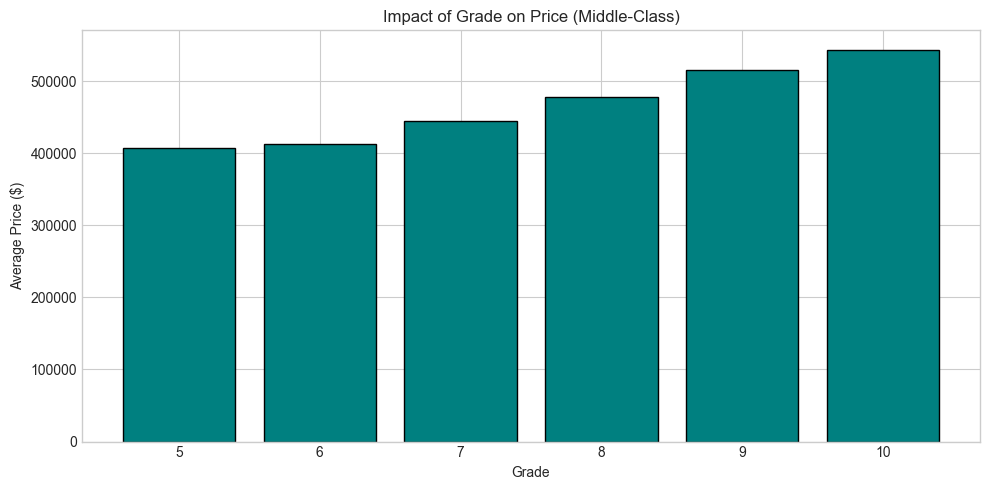

In [18]:
# Visualize grade impact
fig, ax = plt.subplots(figsize=(10, 5))

grades = grade_stats[grade_stats['Count'] >= 10]
ax.bar(grades.index.astype(str), grades['Average Price'], color='teal', edgecolor='black')

ax.set_xlabel('Grade')
ax.set_ylabel('Average Price ($)')
ax.set_title('Impact of Grade on Price (Middle-Class)')

plt.tight_layout()
plt.show()

In [19]:
# Price increase per grade level
print("Price increase by grade level:")
for i in range(6, 10):
    if i in grades.index and i+1 in grades.index:
        increase = grades.loc[i+1, 'Average Price'] - grades.loc[i, 'Average Price']
        print(f"  Grade {i} → {i+1}: +${increase:,.0f}")

Price increase by grade level:
  Grade 6 → 7: +$32,915
  Grade 7 → 8: +$33,157
  Grade 8 → 9: +$36,469
  Grade 9 → 10: +$28,276


### Quality Insight
- Each grade level adds $30K-$50K to average price
- Grade 7-9 is the sweet spot for middle-class
- Improvements that increase grade can provide significant ROI

---
## 7. Finding Example Properties

Properties that match all of Bonnie's criteria:
1. Middle-class price ($322K - $645K)
2. Top-performing zipcodes
3. Good quality (grade ≥ 7)
4. Optimal selling period (April-July)

In [20]:
# Filter for optimal properties
optimal = df_bonnie[
    (df_bonnie['zipcode'].isin(top_zips)) &
    (df_bonnie['grade'] >= 7) &
    (df_bonnie['month'].isin([4, 5, 6, 7]))
].sort_values('price', ascending=False)

print(f"Properties matching all criteria: {len(optimal)}")

Properties matching all criteria: 121


In [21]:
# Top 3 examples
top3 = optimal.head(3)[['price', 'zipcode', 'date', 'grade', 'condition', 
                         'sqft_living', 'bedrooms', 'bathrooms', 'price_per_sqft']]
top3

,price,zipcode,date,grade,condition,sqft_living,bedrooms,bathrooms,price_per_sqft
2647,645000.0,98075,2014-07-08,9,3,2850.0,4.0,2.50,226.315789
21562,645000.0,98119,2014-05-29,9,3,1730.0,3.0,3.25,372.832370
5064,643000.0,98075,2015-04-14,8,3,2518.0,4.0,2.50,255.361398


In [22]:
# Summary
print("=" * 60)
print("EXAMPLE PROPERTIES MATCHING BONNIE'S CRITERIA")
print("=" * 60)

for i, (idx, row) in enumerate(top3.iterrows(), 1):
    print(f"\nProperty {i}:")
    print(f"   Price: ${row['price']:,.0f}")
    print(f"   Zipcode: {row['zipcode']} (Top Neighborhood)")
    print(f"   Sold: {row['date'].strftime('%B %Y')} (Optimal Season)")
    print(f"   Grade: {row['grade']}")
    print(f"   Size: {row['sqft_living']:.0f} sqft")
    print(f"   Layout: {row['bedrooms']:.0f} bed, {row['bathrooms']:.0f} bath")
    print(f"   Price/sqft: ${row['price_per_sqft']:.0f}")

EXAMPLE PROPERTIES MATCHING BONNIE'S CRITERIA

Property 1:
   Price: $645,000
   Zipcode: 98075 (Top Neighborhood)
   Sold: July 2014 (Optimal Season)
   Grade: 9
   Size: 2850 sqft
   Layout: 4 bed, 2 bath
   Price/sqft: $226

Property 2:
   Price: $645,000
   Zipcode: 98119 (Top Neighborhood)
   Sold: May 2014 (Optimal Season)
   Grade: 9
   Size: 1730 sqft
   Layout: 3 bed, 3 bath
   Price/sqft: $373

Property 3:
   Price: $643,000
   Zipcode: 98075 (Top Neighborhood)
   Sold: April 2015 (Optimal Season)
   Grade: 8
   Size: 2518 sqft
   Layout: 4 bed, 2 bath
   Price/sqft: $255


---
## 8. Summary: Recommendations for Bonnie Brown

### Recommendation 1: Sell in Spring/Summer
**Action**: List the property between April and July
- Highest buyer activity
- Better prices achieved
- Faster sales cycles

### Recommendation 2: Price Strategically
**Action**: Price within middle-class sweet spot ($322K - $645K)
- Largest buyer pool
- Faster turnover
- Competitive but profitable

### Recommendation 3: Consider Quality Improvements
**Action**: Invest in grade improvements if below 7
- Each grade level adds $30K-$50K
- Focus on kitchen, bathrooms, curb appeal
- Calculate ROI before investing

---

## Key Results Summary

**When to sell?**: April-July shows highest prices and volume
**Best Locations to sell**: Top zipcodes are 98004, 98040, 98075, 98005, 98119
**Quality**: Grade strongly impacts price (+$30-50K per level)
